In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestRegressor

In [3]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
df = pd.read_csv("C:\\CODSOFT\\TASK 2\\IMDb Movies India.csv",encoding = "latin1")

In [5]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
mean_value_0 = df['Rating'].mean()
mean_value_1 = df['Votes'].mean()
df['Rating'].fillna(value = mean_value_0 , inplace = True)
df['Votes'].fillna(value = mean_value_1 , inplace = True)

In [11]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [12]:
columns_to_check = ['Year', 'Duration', 'Genre','Director','Actor 1','Actor 2','Actor 3']
df.dropna(subset=columns_to_check, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6445 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6445 non-null   object 
 1   Year      6445 non-null   object 
 2   Duration  6445 non-null   object 
 3   Genre     6445 non-null   object 
 4   Rating    6445 non-null   float64
 5   Votes     6445 non-null   float64
 6   Director  6445 non-null   object 
 7   Actor 1   6445 non-null   object 
 8   Actor 2   6445 non-null   object 
 9   Actor 3   6445 non-null   object 
dtypes: float64(2), object(8)
memory usage: 553.9+ KB


In [14]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

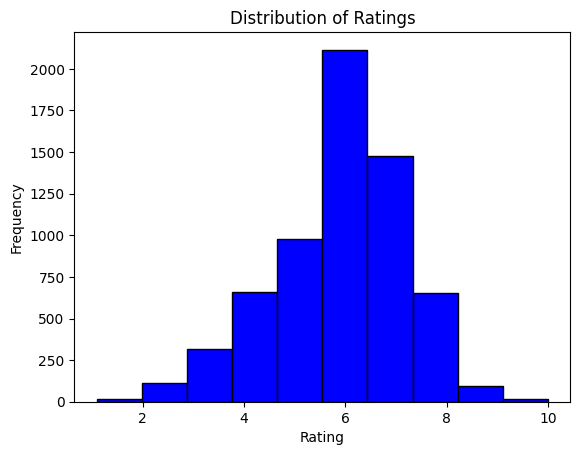

In [15]:
plt.hist(df['Rating'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

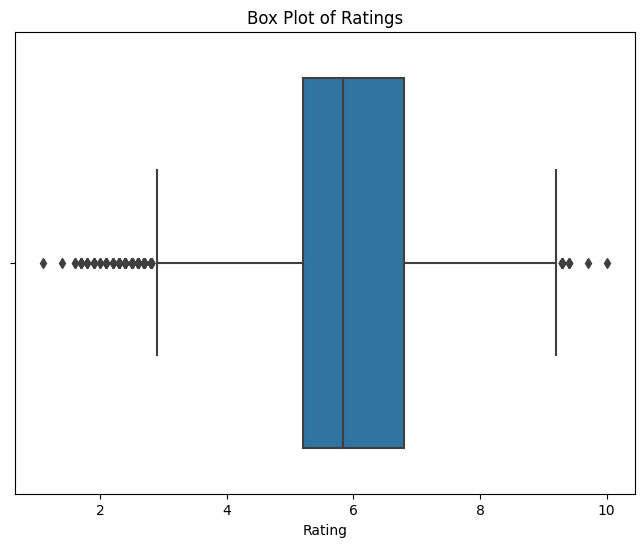

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', data=df)
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()

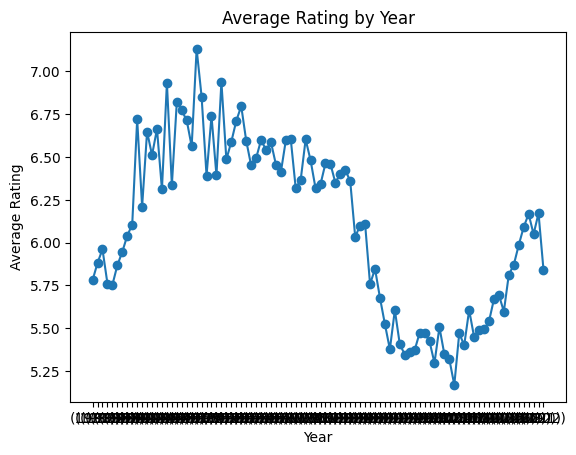

In [17]:
avg_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()
plt.plot(avg_rating_by_year['Year'], avg_rating_by_year['Rating'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.show()

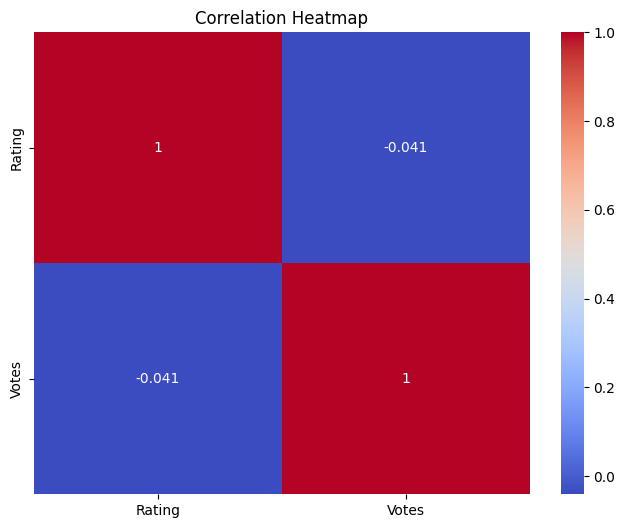

In [18]:
corr_matrix = df[['Rating', 'Votes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df.size

64450

In [20]:
df_encoded = pd.get_dummies(df, columns=['Genre','Director', 'Actor 1', 'Actor 2', 'Actor 3'])

X = df_encoded.drop(columns=['Rating','Name','Year','Duration'])
X['Votes'] = df['Votes']

Y = df['Rating']

In [21]:
X

,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History",...,Actor 3_Zayed Khan,Actor 3_Zeb Rehman,Actor 3_Zeba Rizvi,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zulfi Sayed
1,8.000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,120.839493,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,35.000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120.839493,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,827.000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,408.000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15494,120.839493,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15503,44.000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15505,655.000000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,Y , 
                                   random_state=104,  
                                   test_size=0.20,  
                                   shuffle=True) 

In [23]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, max_samples=0.8, max_features='sqrt')

In [24]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=0.8,
                      n_jobs=-1)

In [25]:
model.score(X_test,y_test)

0.02766395445468206

In [28]:
y_predict=model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error (MSE):', mean_squared_error(y_test, y_predict))
print('Coefficient of determination (R^2):', r2_score(y_test, y_predict))

Mean squared error (MSE): 1.6556903569599932
Coefficient of determination (R^2): 0.02766395445468206


In [30]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')
print("Cross-Validation R^2 scores:", cv_scores)

Cross-Validation R^2 scores: [0.02686975 0.02761693 0.02596567]
